In [2]:
from sklearn.datasets import make_classification

In [5]:
x, y = make_classification(n_samples=100, n_features = 2, n_informative = 1, n_redundant = 0, 
                          n_classes = 2, n_clusters_per_class = 1, random_state=41, hypercube=False, class_sep=20)

In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

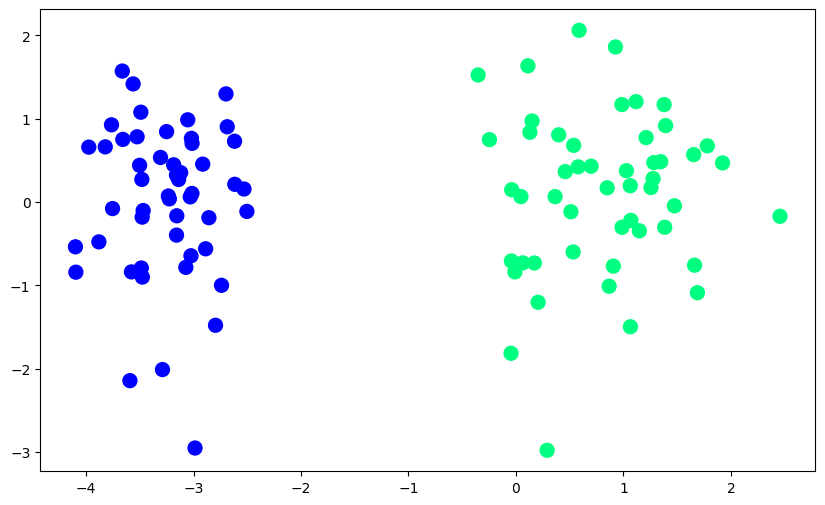

In [19]:
plt.figure(figsize=(10,6))
plt.scatter(x[:,0],x[:,1],c=y,cmap='winter',s=100)

In [20]:
from sklearn.linear_model import LogisticRegression

In [22]:
lr = LogisticRegression(penalty='none',solver='sag')

In [23]:
lr.fit(x,y)

/Users/kunalborade/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


LogisticRegression(penalty='none', solver='sag')

In [24]:
lr.coef_

array([[4.80133697, 0.21239909]])

In [25]:
lr.intercept_

array([5.77423536])

In [26]:
m1 = -(lr.coef_[0][0]/lr.coef_[0][1])

In [27]:
b1 = -(lr.intercept_/lr.coef_[0][1])

In [31]:
x_input = np.linspace(-3,3,100)
y_input = m1 * x_input + b1

In [34]:
def GD(x,y):
    x = np.insert(x,0,1,axis=1)
    weights = np.ones(x.shape[1])
    lr = 0.5
    for i in range(2500):
        y_hat = sigmoid(np.dot(x,weights))
        weights = weights + lr * (np.dot((y-y_hat),x)/x.shape[0])
        
    return weights[1:], weights[0]
    

In [35]:
def sigmoid(z):
    return 1/(1+np.exp(-z))

In [37]:
coef_,intercept_ = GD(x,y)

In [38]:
coef_

array([4.36410145, 0.17189254])

In [39]:
intercept_

5.1480294921597265

In [44]:
m = -(coef_[0]/coef_[1])
b = -(intercept_/coef_[1])

In [45]:
x_input1 = np.linspace(-3,3,100)
y_input1 = m * x_input + b

(-3.0, 2.0)

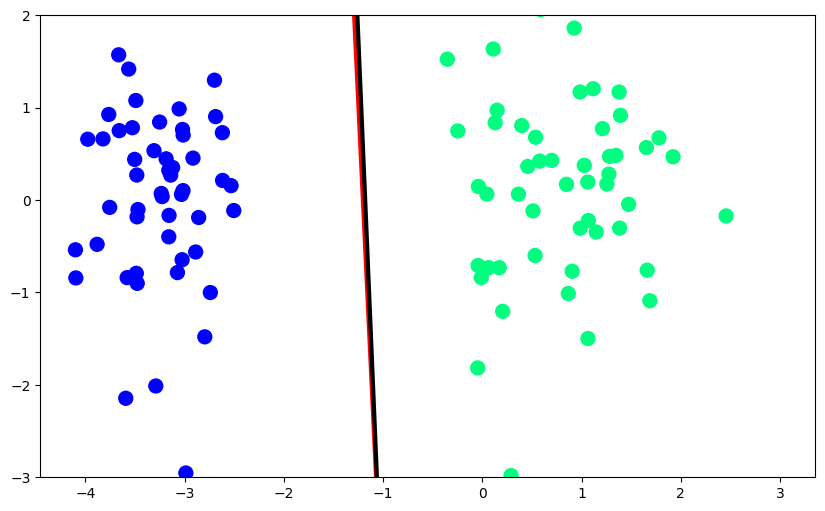

In [46]:
plt.figure(figsize=(10,6))
plt.plot(x_input,y_input,color='red',linewidth=3)
plt.plot(x_input1,y_input1,color='black',linewidth=3)
plt.scatter(x[:,0],x[:,1],c=y,cmap='winter',s=100)
plt.ylim(-3,2)